# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [3]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
employee.pivot_table(index=['Department'], values=['Salary']).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [6]:
# your answer here-2nd way
employee.groupby(['Department']).agg({'Salary':'mean'}).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [7]:
# your answer here
employee.pivot_table(index=['Department', 'Title'], values=['Salary']).reset_index()

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee.pivot_table(index=['Title'], values=['Years','Salary'], aggfunc=np.sum).reset_index()


,Title,Salary,Years
0,VP,140,16
1,analyst,130,9
2,associate,170,12


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [9]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary': np.mean, 'Title': ['count']}).reset_index()

,Department,Title,Salary,Title
,,,mean,count
0,HR,VP,70.0,1
1,HR,analyst,32.5,2
2,IT,VP,70.0,1
3,IT,analyst,32.5,2
4,IT,associate,60.0,1
5,Sales,associate,55.0,2


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [10]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary': [np.median,np.min, np.max, np.std]}).reset_index()

Department      Title Salary                       
                          amax  amin median       std
0         HR         VP   70.0  70.0   70.0       NaN
1         HR    analyst   35.0  30.0   32.5  3.535534
2         IT         VP   70.0  70.0   70.0       NaN
3         IT    analyst   35.0  30.0   32.5  3.535534
4         IT  associate   60.0  60.0   60.0       NaN
5      Sales  associate   55.0  55.0   55.0  0.000000

In [13]:
print("No podemos evaluar con una desviación estándar si solo tenemos 1 valor en el campo")

No podemos evaluar con una desviación estándar si solo tenemos 1 valor en el campo


#### Based on your comments, fill the missing values with an appropriate value

In [14]:
# your answer here

employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary': [np.median,np.min, np.max, np.std]}, fill_value=0).reset_index()

Department      Title Salary                      
                          amax amin median       std
0         HR         VP     70   70   70.0  0.000000
1         HR    analyst     35   30   32.5  3.535534
2         IT         VP     70   70   70.0  0.000000
3         IT    analyst     35   30   32.5  3.535534
4         IT  associate     60   60   60.0  0.000000
5      Sales  associate     55   55   55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [16]:
# your answer here
employee.pivot_table(index=['Department'], values=['Name','Salary'], aggfunc={'Name': ['count'], 'Salary': np.sum}).reset_index()


,Department,Name,Salary
,,count,sum
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [17]:
# your answer here
employee.pivot_table(index=['Department'], values=['Years', 'Salary'], aggfunc={'Years': np.sum, 'Salary': np.mean}).reset_index()

,Department,Salary,Years
0,HR,45.00,14
1,IT,48.75,18
2,Sales,55.00,5


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [18]:
# your answer here
fitbit = pd.read_csv('fitbit.csv')

In [19]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [20]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [21]:
# your answer here
fitbit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [22]:
# your answer here


0.5714518481062608

#### What can you say about Minute Very Active and Steps? Write a comment below

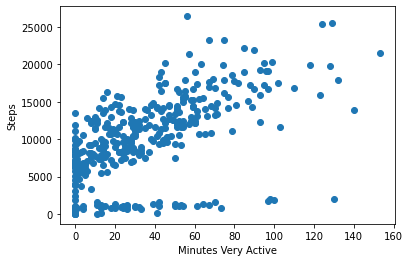

In [24]:
# your comment here
# your answer here
x = fitbit['Minutes Very Active']
y = fitbit['Steps']

plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.scatter(x, y)
plt.show()

In [27]:
print("Hay una correlación positiva entre pasos y minutos muy activo")

Hay una correlación positiva entre pasos y minutos muy activo


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

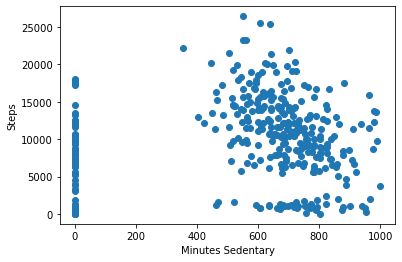

In [29]:
# your answer here
a = fitbit['Minutes Sedentary']
b = fitbit['Steps']

plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.scatter(a, b)
plt.show()

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

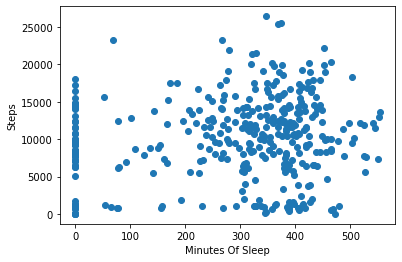

In [31]:
# your answer here
c = fitbit['MinutesOfSleep']
b = fitbit['Steps']

plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.scatter(c, b)
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [32]:
# your answer here

cor_fit = fitbit[['Calorie burned','Steps','Floors','Minutes Sedentary','Minutes Very Active','MinutesOfSleep']]

In [33]:
#Print cor_fit
#Print cor_fit

cor_fit = cor_fit.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [34]:
# your answer here
cor_fit.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [35]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [36]:
#Print time_grades
time_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        15 non-null     object
 1   Study time  15 non-null     int64 
 2   Grade       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


#### Show visually the frequency distribution of the time_grades dataset.

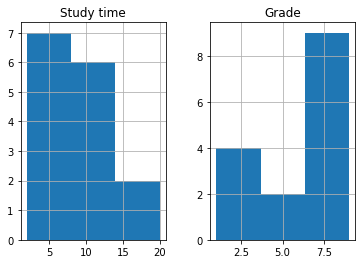

In [39]:
# your answer here
hist = time_grades.hist(bins=3)

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [40]:
# your answer here-Pearson 
time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here